In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\sanjay\\Downloads\\daily-total-female-births.csv")
df

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


<Axes: xlabel='Date', ylabel='Births'>

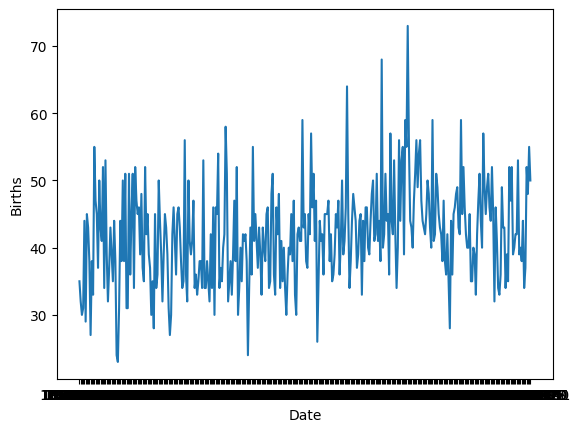

In [3]:
import seaborn as sns
sns.lineplot(x=df['Date'], y=df['Births'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
rsult = adfuller(df['Births'].values)

In [14]:
print("ADF statistic", rsult[0])
print("p-value", rsult[1])
# p-value is less than 0.05 stationary

ADF statistic -4.808291253559767
p-value 5.243412990149787e-05


In [2]:
df = pd.read_csv("C:\\Users\\sanjay\\Downloads\\shampoo_sales.csv")
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [3]:
rsult = adfuller(df['Sales'].values)
print("ADF statistic", rsult[0])
print("p-value", rsult[1])
# p-value is less than 0.05 stationary

ADF statistic 3.060142083641182
p-value 1.0


<Axes: xlabel='Month', ylabel='Sales'>

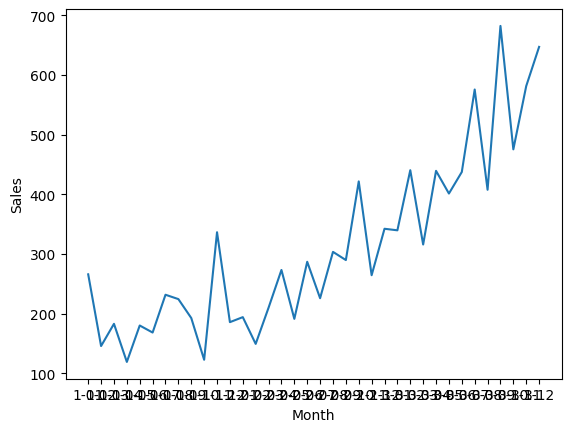

In [4]:
import seaborn as sns
sns.lineplot(x=df['Month'], y=df['Sales'])

In [5]:
def differences(df, interval=1):
    diff = []
    for i in range(interval, len(df)):
        value = df[i]-df[i-interval]
        diff.append(value)
    return pd.Series(diff)

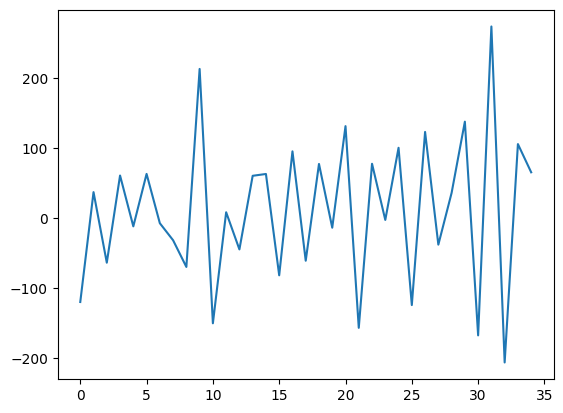

In [6]:
plt.plot(differences(df['Sales']))

In [7]:
rsult = adfuller(differences(df['Sales']))
print("ADF statistic", rsult[0])
print("p-value", rsult[1])
# p-value is less than 0.05 stationary

ADF statistic -7.249074055553854
p-value 1.7998574141687034e-10


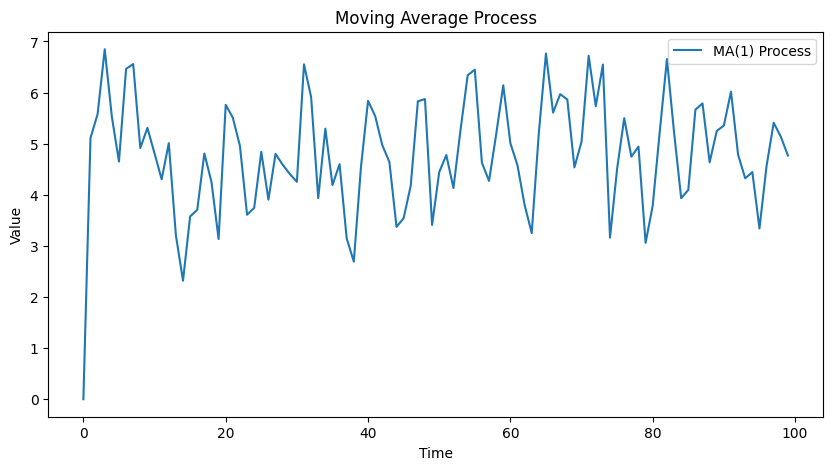

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 5
theta = 0.5
n = 100  # Number of observations

# Generate white noise
np.random.seed(42)
epsilon = np.random.normal(0, 1, n)

# Initialize the time series
Y = np.zeros(n)

# Simulate MA(1) process
for t in range(1, n):
    Y[t] = mu + epsilon[t] + theta * epsilon[t-1]

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(Y, label='MA(1) Process')
plt.title('Moving Average Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 15, 5


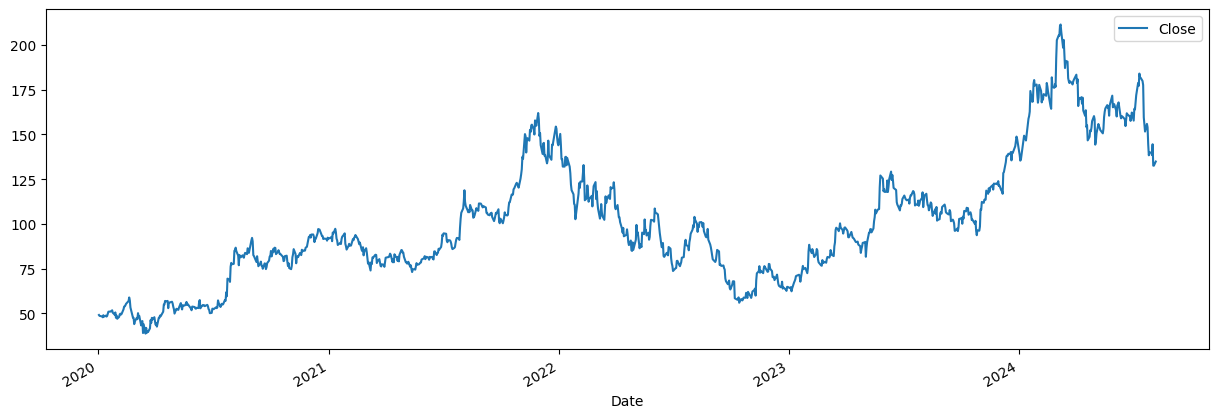

In [3]:
AMD = yf.Ticker("AMD")

# getting the historical market data
AMD_values = AMD.history(start="2020-01-01")

# Plotting the close price of AMD
AMD_values[['Close']].plot();


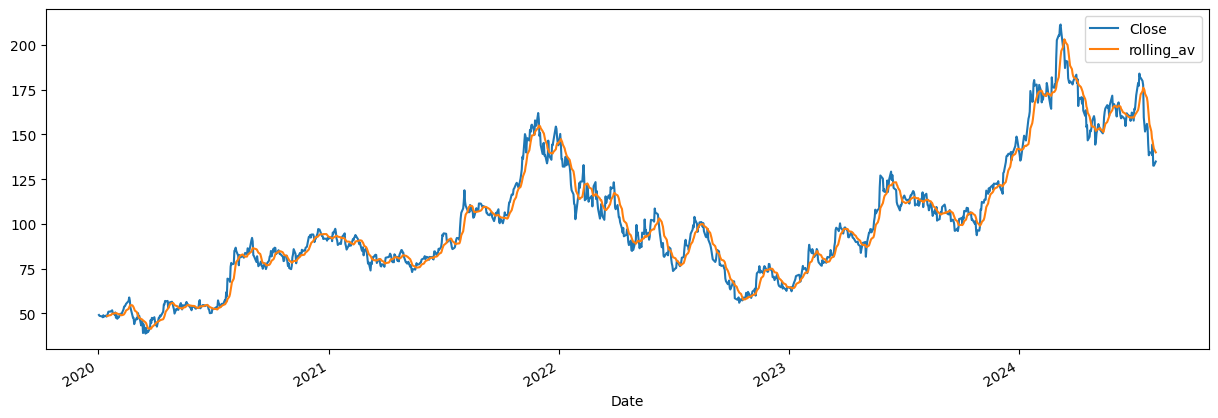

In [4]:
AMD_values['rolling_av'] = AMD_values['Close'].rolling(10).mean()

# plotting 10-day rolling average value with the closing value
AMD_values[['Close','rolling_av']].plot();


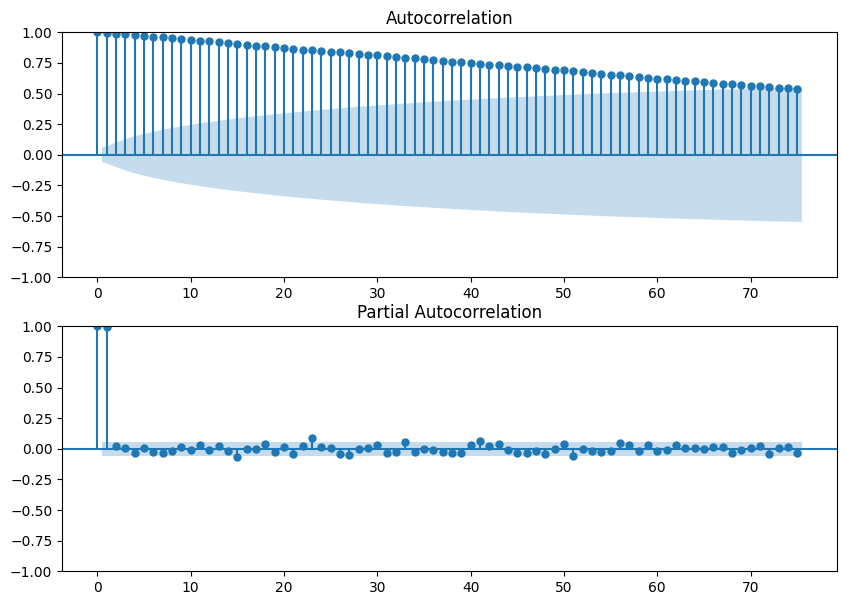

In [5]:
# Function to plot ACF and PACF
def plot_acf_pacf(timeseries):
	fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
	plot_acf(timeseries, ax=ax1, lags=75)
	plot_pacf(timeseries, ax=ax2, lags=75)
	plt.show()


# Plotting ACF and PACF of the closing value time series
plot_acf_pacf(AMD_values['Close'])


In [8]:
#creating the model
MA_model = ARIMA(endog=AMD_values['Close'], order=(0, 0, 55))

#fitting data to the model
results = MA_model.fit()

#summary of the model
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1155
Model:                ARIMA(0, 0, 55)   Log Likelihood               -4073.407
Date:                Tue, 06 Aug 2024   AIC                           8260.814
Time:                        09:33:43   BIC                           8548.769
Sample:                             0   HQIC                          8369.489
                               - 1155                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9012      2.882     34.664      0.000      94.253     105.550
ma.L1          2.4493      0.128     19.182      0.000       2.199       2.700
ma.L2          4.4602      0.426     10.473      0.0

In [7]:
#prediction data
start_date = '2023-12-15'
end_date = '2024-02-05'
AMD_values['prediction'] = results.predict(start=start_date, end=end_date)

#printing last 14 values of the prediction with original and rolling avg value
print(AMD_values[['Close','rolling_av','prediction']].tail(14))


NameError: name 'results' is not defined